BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
PATH='../data/'
train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'test.csv')

col = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
col_train = train[col]
col_test = test[col]

# Stats

In [6]:
print("---train missing---")
print(col_train.isnull().sum())
print("----test missing---")
print(col_test.isnull().sum())

---train missing---
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64
----test missing---
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
dtype: int64


Select the rows with TotalBsmtSF - total square feet of basement area, =0. Missing values in other basement features might be related to 0 TotalBsmtSF

## TotalBsmtSF

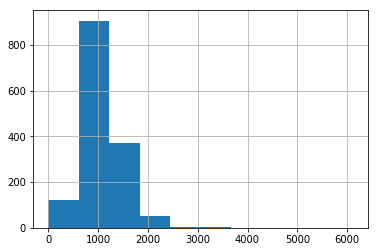

In [7]:
train.TotalBsmtSF.hist()

In [9]:
basement_null_total = train[train.TotalBsmtSF == 0]
basement_null_total.TotalBsmtSF.value_counts()

0    37
Name: TotalBsmtSF, dtype: int64

In [12]:
features_bmt = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1',
               'BsmtUnfSF', 'TotalBsmtSF']
col = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

basement_null_total[features_bmt]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0,0


#### As I suspected, missing values of basement features are due to house has no basement (as can be seen by area of basement columns)

Impute missing values
- BsmtQual: NA
- BsmtCond: NA
- BsmtExporsure: NA
- BsmtFinType1: NA
- BsmtFinType2: NA